In [3]:
%matplotlib inline
import pandas as pd # Importing Libraries
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt # Import for Matplotlib Pyplot
import seaborn as sns 

In [4]:
# read your StreamingHistory files into pandas dataframes
df_stream0 = pd.read_json('StreamingHistory0.json')
df_stream1 = pd.read_json('StreamingHistory1.json')
df_stream2 = pd.read_json('StreamingHistory2.json')
df_stream3 = pd.read_json('StreamingHistory3.json')
df_stream4 = pd.read_json('StreamingHistory4.json')
# depending on the number of files in your Streaming history, you can add or remove these

# panda has concat func -> merges dataframes
df = pd.concat([df_stream0, df_stream1, df_stream2, df_stream3, df_stream4])

#create a 'UniqueID' for each song by combining the fields 'artistName' and 'trackName'
df['UniqueID'] = df['artistName'] + ":" + df['trackName']

#df.to_csv("spotify_data.csv") # To save csv data

df.describe(include="all") # gives the count, unique values, other stats
# include = all -> includes the values with non integer value - NaN 

,endTime,artistName,trackName,msPlayed,UniqueID
count,43340,43340,43340,4.334000e+04,43340
unique,22618,807,1535,NaN,1584
top,2021-05-04 08:27,Taylor Swift,Control,NaN,James Arthur:Train Wreck
freq,21,1882,324,NaN,265
mean,NaN,NaN,NaN,8.054025e+04,NaN
std,NaN,NaN,NaN,9.600058e+04,NaN
min,NaN,NaN,NaN,0.000000e+00,NaN
25%,NaN,NaN,NaN,2.245000e+03,NaN
50%,NaN,NaN,NaN,1.539550e+04,NaN
75%,NaN,NaN,NaN,1.667338e+05,NaN


(array([16238.,  7247.,  6088.,  3535.,  1842.,  1693.,  2327.,  2296.,
         1320.,   754.]),
 array([  0. ,  80.6, 161.2, 241.8, 322.4, 403. , 483.6, 564.2, 644.8,
        725.4, 806. ]),
 <BarContainer object of 10 artists>)

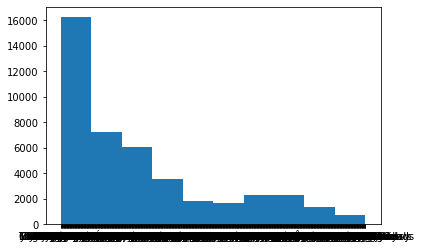

In [8]:
plt.hist(df["artistName"])

# x,y labels and plot title
plt.xlabel("artistName")
plt.ylabel("count")
plt.yticks(rotation=90)
plt.title("Singers")
plt.xticks(rotation=90)

In [9]:
df['UniqueID'].value_counts() # gives the frequency of values(the no of times they occur) 

James Arthur:Train Wreck                                                         265
MIIA:Dynasty                                                                     245
Isak Danielson:Broken                                                            239
AG:Animal                                                                        183
Zoe Wees:Control                                                                 178
                                                                                ... 
James Arthur:If Only                                                               1
Clinton Kane:CHICKEN TENDIES                                                       1
Ben Platt:In Case You Don't Live Forever                                           1
Sander van Marion:Koraal en Variaties over "In Christus is nog oost nog west"      1
Little Mix:Love (Sweet Love) - Acoustic Version                                    1
Name: UniqueID, Length: 1584, dtype: int64

In [10]:
#add a S.no column
df['S.no'] = np.arange(len(df)) 
# len() -> returns no of items in an object
# np.arange = 1 to total no of items 

# [] -> for label names

# reorder columns
df = df[['S.no', 'endTime', 'artistName', 'trackName', 'msPlayed', 'UniqueID']]

df    # displays first 5 and last 5 rows of dataframe

,S.no,endTime,artistName,trackName,msPlayed,UniqueID
0,0,2020-10-01 19:37,Madan Mohan,Tere Liye,10340,Madan Mohan:Tere Liye
1,1,2020-10-02 04:03,Ruelle,Secrets and Lies,8645,Ruelle:Secrets and Lies
2,2,2020-10-02 04:06,James Arthur,Impossible,209440,James Arthur:Impossible
3,3,2020-10-02 04:09,Bryce Fox,Horns,159079,Bryce Fox:Horns
4,4,2020-10-02 04:11,Molly Sandén,Phoenix,121187,Molly Sandén:Phoenix
...,...,...,...,...,...,...
3335,43335,2021-10-02 21:04,Tommee Profitt,Hurricane,376952,Tommee Profitt:Hurricane
3336,43336,2021-10-02 21:10,Taylor Swift,willow,15855,Taylor Swift:willow
3337,43337,2021-10-02 21:10,Hannah Ellis,"You Were Never Gone (From ""Teen Wolf"")",3534,"Hannah Ellis:You Were Never Gone (From ""Teen W..."
3338,43338,2021-10-02 21:10,Hannah Ellis,"You Were Never Gone (From ""Teen Wolf"")",314696,"Hannah Ellis:You Were Never Gone (From ""Teen W..."


In [11]:
df.info()  # info returns the datatypes of each column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43340 entries, 0 to 3339
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   S.no        43340 non-null  int32 
 1   endTime     43340 non-null  object
 2   artistName  43340 non-null  object
 3   trackName   43340 non-null  object
 4   msPlayed    43340 non-null  int64 
 5   UniqueID    43340 non-null  object
dtypes: int32(1), int64(1), object(4)
memory usage: 2.1+ MB


In [14]:
df.nunique() # To see the unique elements present in each column
#df.sample(10) # To check a random sample of the data

S.no          43340
endTime       22618
artistName      807
trackName      1535
msPlayed      22758
UniqueID       1584
dtype: int64

In [9]:
# df["artistName"].unique() #display all unique artists
# len(df["artistName"].unique()) # Length of unique artist

In [10]:
# CLEANING AND FORMATTING

In [11]:
#endtime to date-time column
df["Play-Time"]= pd.to_datetime(df["endTime"]) # To create a additional column

In [12]:
#extracting particular info from play-time
df['year'] =  pd.DatetimeIndex(df["Play-Time"]).year
df['month'] = pd.DatetimeIndex(df["Play-Time"]).month
df['day'] =   pd.DatetimeIndex(df["Play-Time"]).day
df['weekday'] = pd.DatetimeIndex(df["Play-Time"]).weekday
df['time'] = pd.DatetimeIndex(df["Play-Time"]).time
df['hours'] = pd.DatetimeIndex(df["Play-Time"]).hour

df['day-name'] = df["Play-Time"].apply(lambda x: x.day_name())
df['Count'] = 1  #to keep track of the count of the songs.

In [13]:
#df

In [14]:
# msPlayed to proper format
# to_timedata 
df["Time-Played (hh-mm-ss)"] = pd.to_timedelta(df["msPlayed"], unit='ms')

In [15]:
#df.head()

In [16]:
#create functions to convert to hours and mins
def hours(td):
    '''To get the hour information'''
    return td.seconds/3600

def minutes(td):
    '''To get the minutes information'''
    return (td.seconds/60)%60

#new columns for hours and minutes
df["Listening Time(Hours)"] = df["Time-Played (hh-mm-ss)"].apply(hours).round(3)
df["Listening Time(Minutes)"] = df["Time-Played (hh-mm-ss)"].apply(minutes).round(3) #roundoff to 3 decimal places

In [17]:
#df.head()

In [18]:
df.drop(columns=["endTime","msPlayed", "Time-Played (hh-mm-ss)"], inplace=True)
#inplace as True - updates the dataframe directly, rather than re-assigning it again.

In [19]:
df.describe()

,S.no,year,month,day,weekday,hours,Count,Listening Time(Hours),Listening Time(Minutes)
count,43340.00000,43340.000000,43340.000000,43340.000000,43340.00000,43340.000000,43340.0,43340.000000,43340.000000
mean,21669.50000,2020.818113,6.327434,15.623996,3.00773,12.610245,1.0,0.022239,1.334363
std,12511.32467,0.385756,3.297694,8.830489,1.98676,4.314823,0.0,0.026663,1.599656
min,0.00000,2020.000000,1.000000,1.000000,0.00000,0.000000,1.0,0.000000,0.000000
25%,10834.75000,2021.000000,4.000000,8.000000,1.00000,10.000000,1.0,0.001000,0.033000
50%,21669.50000,2021.000000,6.000000,16.000000,3.00000,13.000000,1.0,0.004000,0.250000
75%,32504.25000,2021.000000,9.000000,23.000000,5.00000,16.000000,1.0,0.046000,2.767000
max,43339.00000,2021.000000,12.000000,31.000000,6.00000,22.000000,1.0,0.521000,31.233000


In [20]:
#PART 3
#EXPORATORY DATA ANALYSIS AND VISUALIZATION

In [21]:
#visualisation environment
sns.set_style('darkgrid')
plt.style.use('seaborn-darkgrid')

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [22]:
unique_artists = df["artistName"].nunique() # Count number of unique artist in dataset
total_artists = df["artistName"].count() # Count total artist in dataset
unique_artist_percentage = unique_artists/total_artists*100 # Get the percentage of the unique
unique_artist_percentage

1.862021227503461

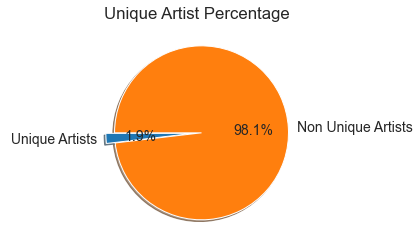

In [23]:
unique_artist_list = np.array([unique_artists, total_artists-unique_artists]) # Make an array out of the results
unique_artist_list_labels = [" Unique Artists", "Non Unique Artists"] # Make a lable for them

fig, ax = plt.subplots(figsize=(4,4))   #pyplot API is generally less-flexible than the object-oriented API.
ax.pie(unique_artist_list, labels= unique_artist_list_labels, autopct='%1.1f%%',explode=[0.05,0.05] ,startangle=180, shadow = True);
plt.title("Unique Artist Percentage");

In [24]:
#displaying top 10 artists
top_10_artist_df = df.groupby(["artistName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Listening Time(Minutes)",ascending=False)
top_10_artist_df.head(6)

,Listening Time(Hours),Listening Time(Minutes),Count
artistName,,,
Taylor Swift,41.490,2488.090,1882
Alina Baraz,26.266,1575.220,719
James Arthur,25.468,1526.568,804
Ruelle,22.185,1331.037,1231
Halsey,18.532,1111.948,814
Paolo Buonvino,16.817,1008.852,499


In [25]:
top_10_artist_time_df = df.groupby(["artistName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Listening Time(Minutes)",ascending=False)
top_10_artist_time_df.head(5)

,Listening Time(Hours),Listening Time(Minutes),Count
artistName,,,
Taylor Swift,41.490,2488.090,1882
Alina Baraz,26.266,1575.220,719
James Arthur,25.468,1526.568,804
Ruelle,22.185,1331.037,1231
Halsey,18.532,1111.948,814


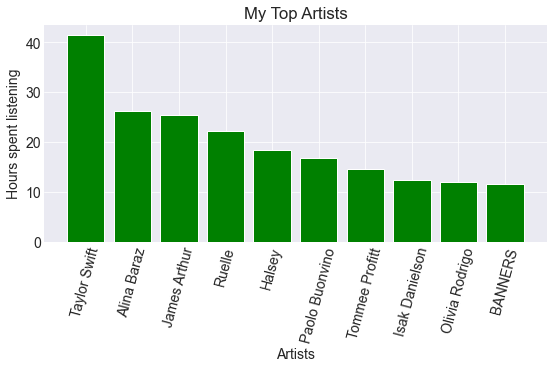

In [26]:
fig,ax = plt.subplots(figsize=(9,4))
ax.bar(top_10_artist_time_df.head(10).index, top_10_artist_time_df["Listening Time(Hours)"].head(10), color='green')
ax.set(title="My Top Artists", xlabel="Artists", ylabel="Hours spent listening");
plt.xticks(rotation=75);

In [27]:
top_10_artist_count_df = df.groupby(["artistName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Count",ascending=False)
top_10_artist_count_df.head(6)

,Listening Time(Hours),Listening Time(Minutes),Count
artistName,,,
Taylor Swift,41.490,2488.090,1882
Ruelle,22.185,1331.037,1231
Halsey,18.532,1111.948,814
James Arthur,25.468,1526.568,804
Alina Baraz,26.266,1575.220,719
The Chainsmokers,10.303,617.749,641


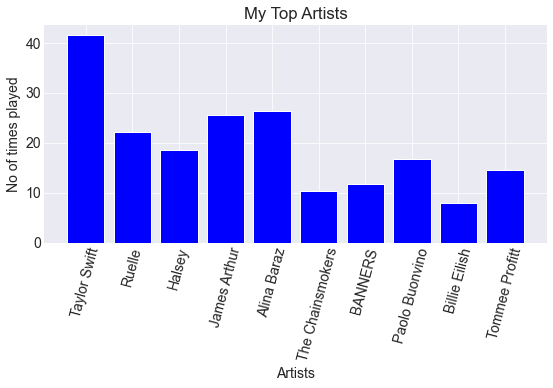

In [28]:
fig,ax = plt.subplots(figsize=(9,4))
ax.bar(top_10_artist_count_df.head(10).index, top_10_artist_count_df["Listening Time(Hours)"].head(10), color='blue')
ax.set(title="My Top Artists", xlabel="Artists", ylabel="No of times played");
plt.xticks(rotation=75);

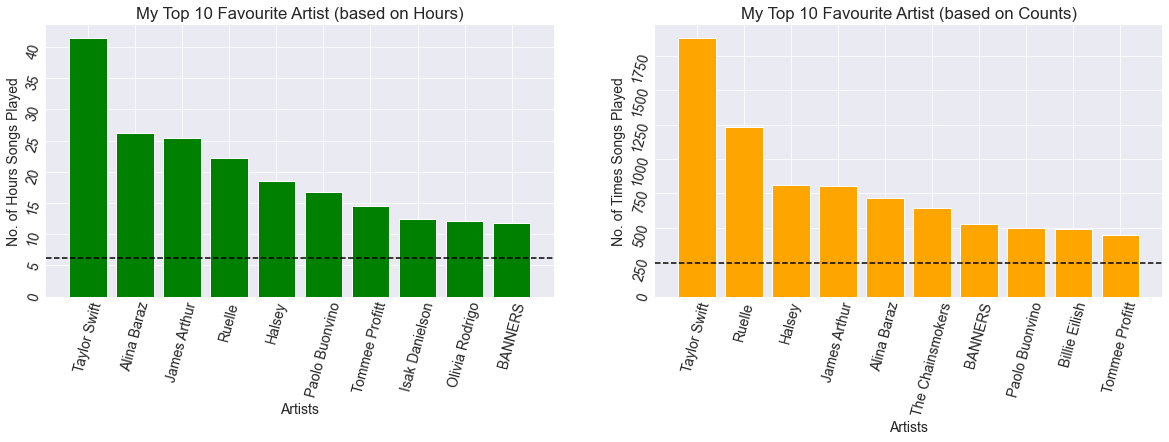

In [29]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))

#plot 1
ax1.bar(top_10_artist_time_df.head(10).index,top_10_artist_time_df["Listening Time(Hours)"].head(10), color="green")
ax1.set(title="My Top 10 Favourite Artist (based on Hours)",xlabel="Artists",ylabel="No. of Hours Songs Played");
ax1.tick_params(labelrotation=75);
ax1.axhline(top_10_artist_time_df["Listening Time(Hours)"][:100].mean(), linestyle="--", color="black")

#plot 2
ax2.bar(top_10_artist_count_df.head(10).index,top_10_artist_count_df["Count"].head(10), color="orange")
ax2.set(title="My Top 10 Favourite Artist (based on Counts)",xlabel="Artists",ylabel="No. of Times Songs Played");
ax2.tick_params(labelrotation=75);
ax2.axhline(top_10_artist_count_df["Count"][:100].mean(), linestyle="--", color="black");

In [30]:
#Tracks Exploration

In [31]:
unique_songs = df["trackName"].nunique()
total_songs = df["trackName"].count()
unique_songs_percentage = unique_songs/total_songs*100
unique_songs_percentage

3.5417628057221964

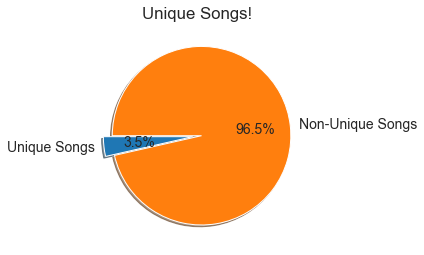

In [32]:
unique_songs_list = np.array([unique_songs, total_songs-unique_songs])
unique_songs_list_labels = ["Unique Songs", "Non-Unique Songs"]

fig, ax = plt.subplots(figsize=(4,6))
ax.pie(unique_songs_list, labels= unique_songs_list_labels, autopct='%1.1f%%', explode=[0.05,0.05], startangle=180, shadow= True);
plt.title("Unique Songs!");

In [33]:
#displaying top 10 artists
top_10_tracks_df = df.groupby(["UniqueID"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Listening Time(Minutes)",ascending=False)
top_10_tracks_df.head(6)

,Listening Time(Hours),Listening Time(Minutes),Count
UniqueID,,,
MIIA:Dynasty,9.447,568.611,245
James Arthur:Train Wreck,9.349,559.470,265
Isak Danielson:Broken,9.265,556.016,239
Alina Baraz:To Me,8.767,526.096,166
NF:Paralyzed,7.067,424.021,175
Cary Brothers:Belong,6.888,412.917,161


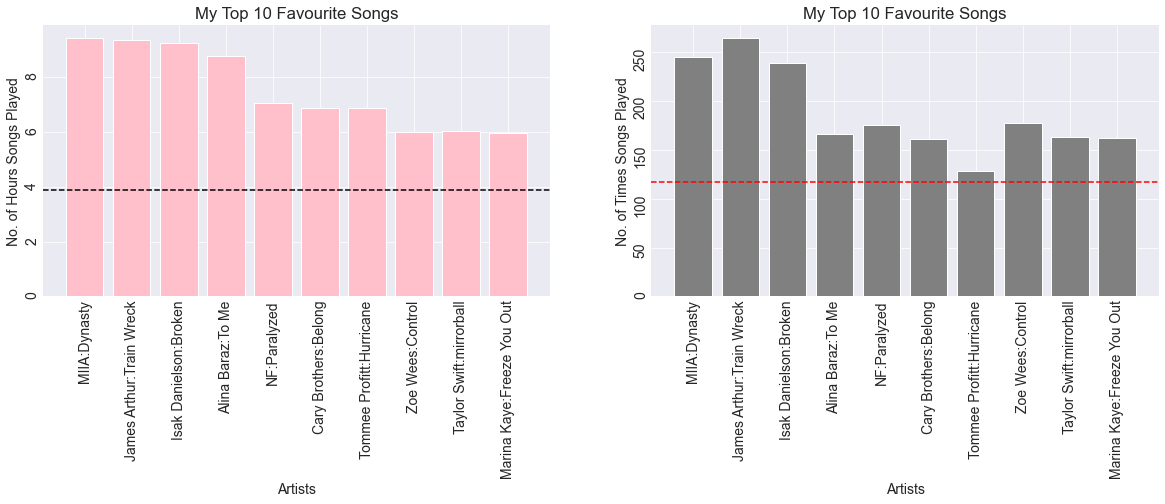

In [34]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))

# Setting up our first graph
ax1.bar(top_10_tracks_df.head(10).index,top_10_tracks_df["Listening Time(Hours)"].head(10), color="pink")
ax1.set(title="My Top 10 Favourite Songs",xlabel="Artists",ylabel="No. of Hours Songs Played");
ax1.tick_params(labelrotation=90);
ax1.axhline(top_10_tracks_df["Listening Time(Hours)"][:100].mean(), linestyle="--", color="black")

# Setting up our second graph
ax2.bar(top_10_tracks_df.head(10).index,top_10_tracks_df["Count"].head(10), color="gray")
ax2.set(title="My Top 10 Favourite Songs",xlabel="Artists",ylabel="No. of Times Songs Played");
ax2.tick_params(labelrotation=90);
ax2.axhline(top_10_tracks_df["Count"][:100].mean(), linestyle="--", color="r");

In [35]:
#Day Wise Usage (Exploration)

In [36]:
df["day-name"].value_counts()

Friday       7002
Monday       6222
Saturday     6099
Thursday     6026
Tuesday      6020
Wednesday    6018
Sunday       5953
Name: day-name, dtype: int64

In [37]:
df["day-name"].value_counts().index

Index(['Friday', 'Monday', 'Saturday', 'Thursday', 'Tuesday', 'Wednesday',
       'Sunday'],
      dtype='object')

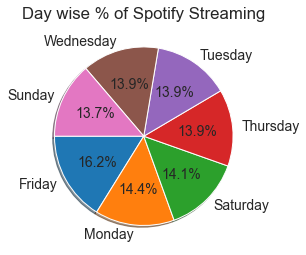

In [38]:
fig, ax = plt.subplots(figsize=(4,6))
ax.pie(df["day-name"].value_counts(), labels=df["day-name"].value_counts().index, autopct='%1.1f%%', startangle=180, shadow = True);
ax.set(title="Day wise % of Spotify Streaming");

In [39]:
#Average Usage over a day (Exploration)

<AxesSubplot:title={'center':'Average Distribution of Streaming Over a Day'}, xlabel='Hours (in 24 hour format)', ylabel='Songs Played'>

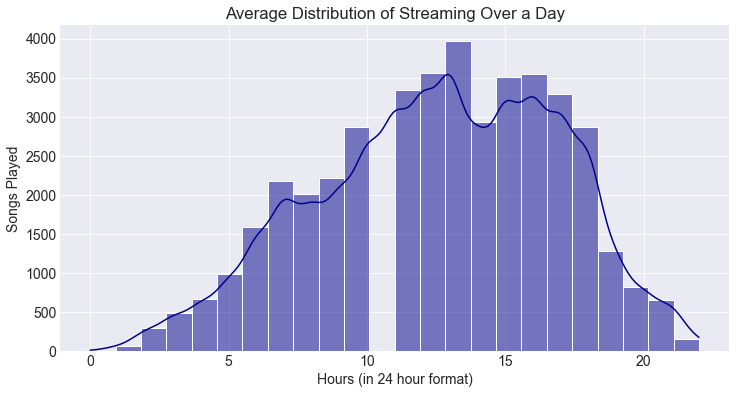

In [40]:
fig, ax = plt.subplots(figsize=(12,6))
ax.set(title="Average Distribution of Streaming Over a Day",xlabel="Hours (in 24 hour format)", ylabel="Songs Played")
sns.histplot(df['hours'], bins= 24, kde=True, color='darkblue')
#kde -> curvey line showing average

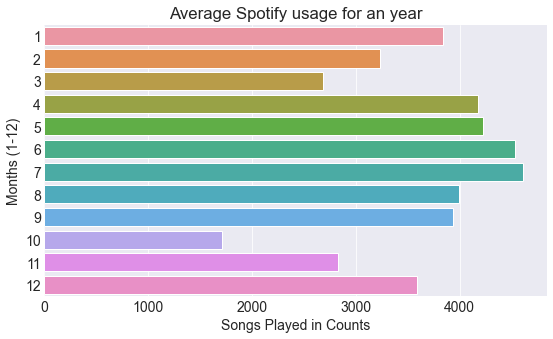

In [41]:
#fig, ax = plt.subplots(figsize=(12,6))

ax = sns.countplot(y= df["month"])
ax.set(title="Average Spotify usage for an year", xlabel="Songs Played in Counts", ylabel="Months (1-12)");

In [42]:
#Questions
#These questions can be exploratory, analytical or formative.

In [43]:
time_spent_hours = df["Listening Time(Hours)"].sum() # Summation of all 
time_spent_hours

963.8190000000001

In [44]:
#Confused what happened below.. next 4

In [45]:
date_df = df["Play-Time"] # Making a new dataset of time only

In [46]:
time_difference = (date_df.iloc[10803] - date_df.iloc[0]) / np.timedelta64(1,"D") # Calulating total possible days in days
time_difference_hours = time_difference*24 # Converting that in hours by multiplying with 24
time_difference_hours

2756.583333333333

In [47]:
time_spent_percentage = time_spent_hours/time_difference_hours*100
time_spent_percentage


34.96426131382449

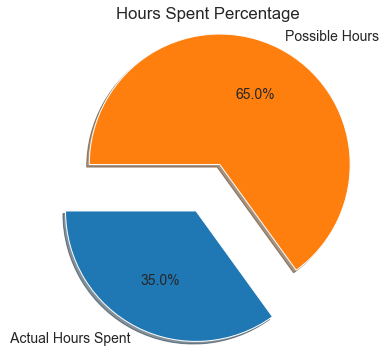

In [48]:
hours_spent_list = np.array([time_spent_hours, time_difference_hours-time_spent_hours])
hours_spent_list_labels = [" Actual Hours Spent", "Possible Hours"]

fig, ax = plt.subplots(figsize=(12,6))
ax.pie(hours_spent_list, labels= hours_spent_list_labels, autopct='%1.1f%%',  explode=[0.2,0.2], startangle=180, shadow = True);
plt.title("Hours Spent Percentage");

In [49]:
#Total Songs played daily
total_songs = df["trackName"].count() # Total Songs played
time_difference # Total days when I used Spotify

114.85763888888889

In [50]:
average_songs_played_daily = (total_songs / time_difference).round()
average_songs_played_daily

377.0

In [53]:
#most songs played on which date
df["date"] = df["Play-Time"].dt.date # Creating a new column with date
most_songs = df.groupby(["date"])[["Count"]].sum().sort_values(by="Count", ascending=False)
most_songs.head(1)

,Count
date,
2020-12-31,269


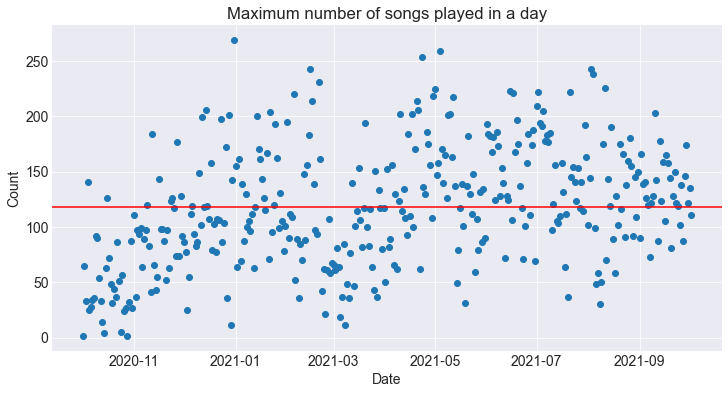

In [61]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(most_songs.index, most_songs["Count"])
ax.set(title="Maximum number of songs played in a day",xlabel="Date", ylabel="Count")
ax.axhline(most_songs["Count"].mean(), linestyle='-', color="r")

In [64]:
top_10_artists=df.groupby(["artistName"])["Count"].count()
top_10_artists.sort_values(ascending=False).head(100)

artistName
Taylor Swift    1882
Ruelle          1231
Halsey           814
James Arthur     804
Alina Baraz      719
                ... 
Ankit Tiwari     115
Harry Styles     115
Lola Blanc       114
Loren Gray       113
Dawn Golden      113
Name: Count, Length: 100, dtype: int64

In [72]:
my_fav_artist_playlist = df.groupby(["artistName","trackName"])[["Count"]].count().sort_values(by="Count",ascending=False).head(100)
my_fav_artist_playlist

,,Count
artistName,trackName,
James Arthur,Train Wreck,265
MIIA,Dynasty,245
Isak Danielson,Broken,239
AG,Animal,183
Zoe Wees,Control,178
...,...,...
SYML,Where's My Love,93
Sam Tinnesz,Play with Fire (feat. Yacht Money) - Extended Mix,93
Andrew Belle,In My Veins - Feat. Erin Mccarley,93


In [82]:
#Active usage in a day over a week
#show using heatmap
active_usage = df.groupby(['hours','day-name'])["artistName"].size().reset_index()
active_usage_pivot = active_usage.pivot("hours", 'day-name', 'artistName')
active_usage_pivot.head()

day-name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hours,,,,,,,
0,NaN,6.0,2.0,1.0,1.0,NaN,NaN
1,NaN,21.0,37.0,NaN,NaN,9.0,NaN
2,63.0,17.0,85.0,31.0,45.0,23.0,30.0
3,81.0,73.0,118.0,23.0,52.0,81.0,68.0
4,168.0,74.0,93.0,64.0,60.0,154.0,61.0


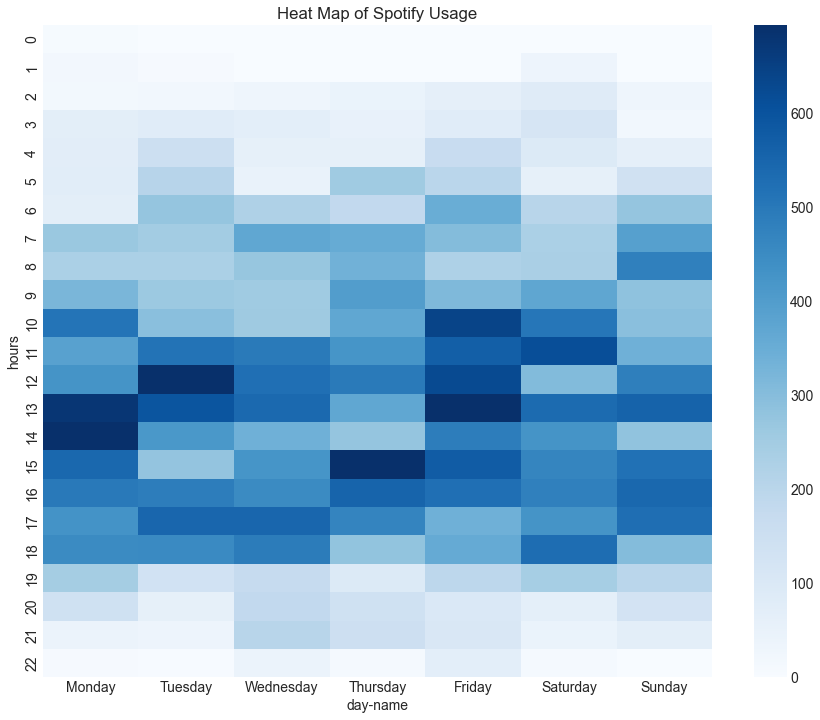

In [88]:
days = ["Monday", 'Tuesday', "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

fig, ax = plt.subplots(figsize=(15,12))
ax.set(title="Heat Map of Spotify Usage", xlabel="Days of the Week",ylabel="Time(in 24 hrs format)");
ax = sns.heatmap(active_usage_pivot[days].fillna(0), robust=True, cmap="Blues", ax = ax);

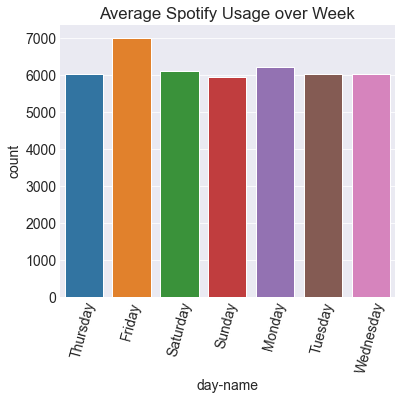

In [93]:
#variation over a week
fig, ax = plt.subplots(figsize=(6,5))
ax.set(title="Average Spotify Usage over Week",xlabel="Days of the Week",ylabel="Counts of Songs Played");

ax = sns.countplot(x=df["day-name"],ax=ax)
plt.xticks(rotation=75);

In [94]:
extra_df = df.copy()
extra_df['is_weekend'] = extra_df["day-name"].isin(['Sunday','Saturday'])
weekday_vs_weekend = extra_df.groupby(['is_weekend'])[['Count']].sum()
weekday_vs_weekend

,Count
is_weekend,
False,31288
True,12052


In [95]:
weekday_vs_weekend["Percentage"] = weekday_vs_weekend["Count"]/weekday_vs_weekend["Count"].sum()*100
weekday_vs_weekend

,Count,Percentage
is_weekend,,
False,31288,72.19197
True,12052,27.80803


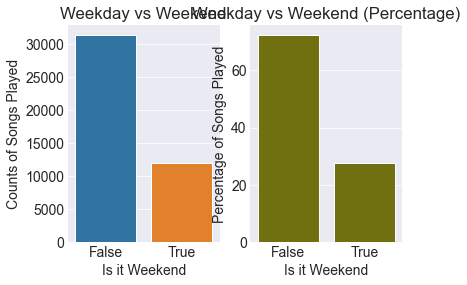

In [99]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(6,4))
ax1 = sns.barplot(x=["False","True"],y="Count",data=weekday_vs_weekend,ax=ax1)
ax1.set(title="Weekday vs Weekend",xlabel="Is it Weekend",ylabel="Counts of Songs Played");

ax2 = sns.barplot(x=["False","True"],y="Percentage",data=weekday_vs_weekend,color="Olive",ax=ax2)
ax2.set(title="Weekday vs Weekend (Percentage)",xlabel="Is it Weekend",ylabel="Percentage of Songs Played");

In [100]:
# I have played songs of 2359 Unique Artist which comprises 21.83 % of total artist in my streaming history.
# I have played 4068 Unique Songs which comprises 37.65 % of total songs in my streaming history.
# Of all the days, I'm most active in Spotify on Fridays.
# My most active hours ranges from 8 AM to 7 PM. Maximum around 4PM-5PM hour period and Minimum at 12AM-1PM hour period.
# I played 39 songs on average per day.
# On 21st April 2021 I played 390 Songs which is my personal maximum.
# Since the day I created my Spotify Account, I played the most songs in April 2021.
# I have spent almost 369 hours streaming on spotify till now. That's about 5.5% of the possible 6688.5 hours
# My favourite artist whom I've played most is Lauv. While my favourite song is bitches broken hearts by Billie Eilish

In [2]:
import jovian
jovian.commit(file=["spotify_data.csv","StreamingHistory0.json","StreamingHistory1.json","StreamingHistory2.json","StreamingHistory3.json","StreamingHistory4.json"])

<IPython.core.display.Javascript object>

[jovian] Updating notebook "aafreen2603/my-spotify-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/aafreen2603/my-spotify-analysis


'https://jovian.ai/aafreen2603/my-spotify-analysis'